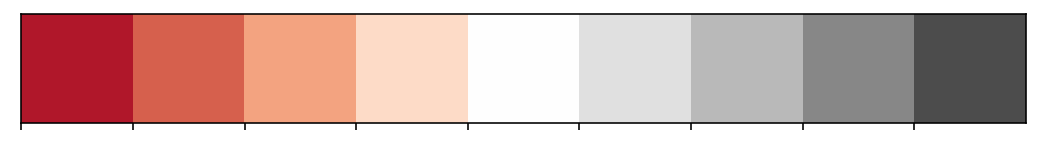

In [4]:
#시작 전 설정
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import pandas as pd
import numpy as np
#원하는 한글폰트 지정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False) #Y축
#경고메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
custom_palette = sns.color_palette("RdGy", 9)
sns.palplot(custom_palette)

In [1]:
import pandas as pd
conf=pd.read_csv('E:/kim_jiwon/src/Project_02/data/물질적_박탈감_경험_여부_20210412164931.csv',sep=',',encoding='cp949')
conf

,특성별(1),특성별(2),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,...,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17,2020.18,2020.19
0,특성별(1),특성별(2),돈이 없어서 임대료 대출금 관리비 등 주거관련 비용을 지불하지 못했다,돈이 없어서 임대료 대출금 관리비 등 주거관련 비용을 지불하지 못했다,돈이 없어서 임대료 대출금 관리비 등 주거관련 비용을 지불하지 못했다,돈이 없어서 집의 냉·난방을 유지하지 못했다,돈이 없어서 집의 냉·난방을 유지하지 못했다,돈이 없어서 집의 냉·난방을 유지하지 못했다,돈이 없어서 예상치 못한 지출이 발생했을 때 비용을 지불하지 못했다,돈이 없어서 예상치 못한 지출이 발생했을 때 비용을 지불하지 못했다,...,돈이 없어서 휴일에 놀러가지 못하거나 사고 싶은 것을 사지 못했다,돈이 없어서 휴일에 놀러가지 못하거나 사고 싶은 것을 사지 못했다,TV를 가지고 있지 않다,TV를 가지고 있지 않다,냉장고를 가지고 있지 않다,냉장고를 가지고 있지 않다,자동차를 가지고 있지 않다,자동차를 가지고 있지 않다,타인에게 연락할 수 있는 통신수단(집전화 휴대전화)을 가지고 있지 않다,타인에게 연락할 수 있는 통신수단(집전화 휴대전화)을 가지고 있지 않다
1,특성별(1),특성별(2),예,아니오,잘 모름,예,아니오,잘 모름,예,아니오,...,예,아니오,예,아니오,예,아니오,예,아니오,예,아니오
2,전체,소계,2.7,86.8,10.5,0.8,90.2,8.9,7.9,92.1,...,7.7,92.3,2.2,97.8,1.1,98.9,28.5,71.5,0.3,99.7
3,성별,남자,1.9,87.8,10.3,0.6,90.5,8.9,6.8,93.2,...,7.1,92.9,2.1,97.9,1.3,98.7,27.4,72.6,0.2,99.8
4,성별,여자,3.6,85.7,10.7,1.1,90.0,9.0,9.1,90.9,...,8.4,91.6,2.2,97.8,0.8,99.2,29.7,70.3,0.5,99.5
5,연령별,만15-18세,0.4,68.5,31.1,0.0,72.8,27.2,5.7,94.3,...,-,-,-,-,-,-,-,-,-,-
6,연령별,만19-29세,2.9,84.4,12.6,1.2,88.2,10.7,9.2,90.8,...,-,-,-,-,-,-,-,-,-,-
7,연령별,만30-39세,3.1,94.8,2.1,0.8,97.6,1.7,7.3,92.7,...,-,-,-,-,-,-,-,-,-,-
8,연령별,만18-19세,-,-,-,-,-,-,-,-,...,7.2,92.8,1.3,98.7,0.9,99.1,35.9,64.1,0.0,100.0
9,연령별,만20-24세,-,-,-,-,-,-,-,-,...,8.1,91.9,2.4,97.6,1.1,98.9,36.3,63.7,0.4,99.6


In [2]:
# 일단 시계열/문항/항목/전체만 남긴다.
#4개 행만 남겨보기
conf1=conf.iloc[0:3,2:]
conf1=conf1.T.reset_index()
conf1.columns=['년도','문항','항목','응답수치']
conf1["년도"]= conf1["년도"].apply(lambda x:int(x.split(".")[0]))
conf1.응답수치=conf1.응답수치.astype(float)
conf1

,년도,문항,항목,응답수치
0,2017,돈이 없어서 임대료 대출금 관리비 등 주거관련 비용을 지불하지 못했다,예,2.7
1,2017,돈이 없어서 임대료 대출금 관리비 등 주거관련 비용을 지불하지 못했다,아니오,86.8
2,2017,돈이 없어서 임대료 대출금 관리비 등 주거관련 비용을 지불하지 못했다,잘 모름,10.5
3,2017,돈이 없어서 집의 냉·난방을 유지하지 못했다,예,0.8
4,2017,돈이 없어서 집의 냉·난방을 유지하지 못했다,아니오,90.2
...,...,...,...,...
75,2020,냉장고를 가지고 있지 않다,아니오,98.9
76,2020,자동차를 가지고 있지 않다,예,28.5
77,2020,자동차를 가지고 있지 않다,아니오,71.5
78,2020,타인에게 연락할 수 있는 통신수단(집전화 휴대전화)을 가지고 있지 않다,예,0.3


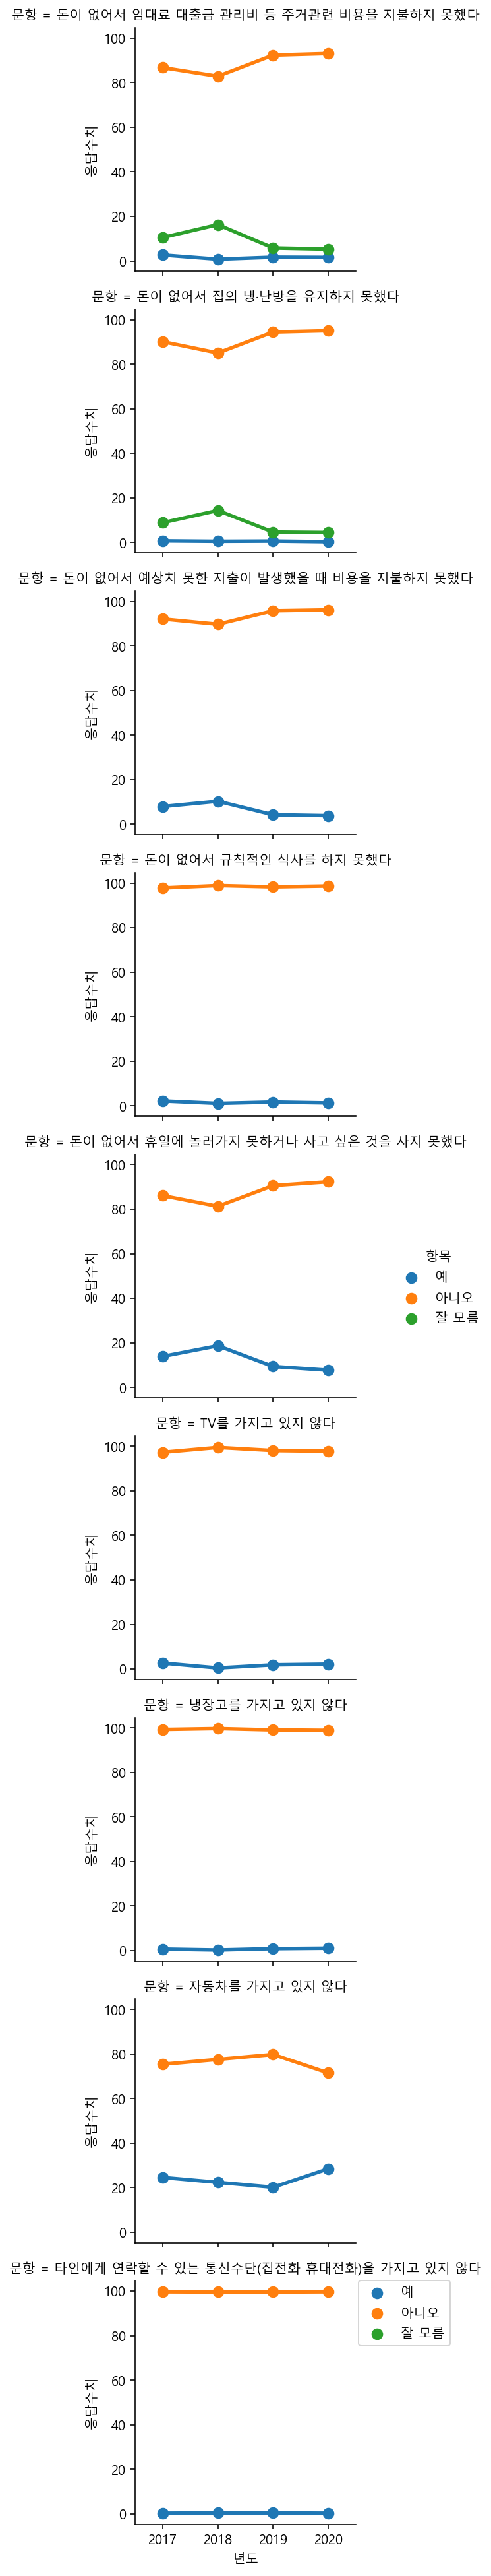

In [5]:
#문항별로 묶고 항목별로 나눠야? 
sns.catplot(data=conf1, x="년도",y="응답수치", kind="point", col="문항", hue="항목",col_wrap=1,
                      height=3, aspect=1, linewidth=2,ci=None) 

plt.legend(bbox_to_anchor=(1.01,1.0),loc=0,borderaxespad=0)
#plt.savefig('E:/kim_jiwon/src/project_02/img/주관적_정신건강_수준_문항별항목별.png')
